In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## The panama papers content

###  Entities:

In [2]:
entities = pd.read_csv('../data/panama/Entities.csv', header=0, low_memory=False)

Retain only Swiss Entities (not matching some wrong country classification):

In [3]:
from helpers.swiss_codes import filter_swiss
swiss_entities = filter_swiss(entities)

In [4]:
percent = 100*len(swiss_entities)/len(entities)
print('%.2f' % percent, '% of the entities are located in Switzerland.')

7.68 % of the entities are located in Switzerland.


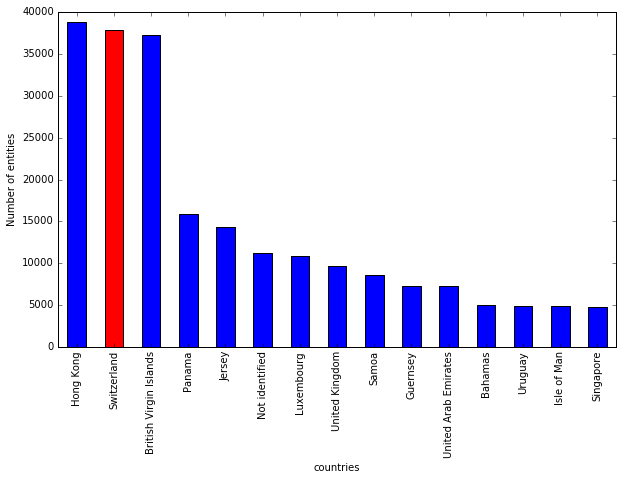

In [5]:
df = entities[['name','countries']].groupby('countries').count() \
    .sort_values(by='name',ascending=False).head(15)
df.plot.bar(legend=False, figsize=(10,6), color=['r' if d == 'Switzerland' else 'b' for d in df.index])
plt.ylabel('Number of entities')
plt.show()

Parse all Swiss Entities and assign corresponding postal code and canton column:

In [6]:
from helpers.swiss_codes import add_columns

data = add_columns(swiss_entities)

In [7]:
import json
try:
    with open('data/addresses.json', 'r') as fp:
        addresses = json.load(fp)
except:
    code_url = 'http://api.geonames.org/postalCodeSearchJSON?'
    params = {'username':'lionelfleury','country':'CH','postalcode':'1015'}
    addresses = {}
    for code in postal_codes:
        params.update({'postalcode':code})
        r = requests.get(code_url, params)
        try:
            a = r.json()['postalCodes'][0]
            addresses[code] = a
        except:
            print('Postal code not found:',code)

In [8]:
addresses['1000']

{'adminCode1': 'VD',
 'adminCode2': '2225',
 'adminCode3': '5586',
 'adminName1': 'Canton de Vaud',
 'adminName2': 'District de Lausanne',
 'adminName3': 'Lausanne',
 'countryCode': 'CH',
 'lat': 46.52913524902344,
 'lng': 6.652444170227051,
 'placeName': 'Lausanne',
 'postalCode': '1000'}

### Intermedietaries

In [9]:
inter = pd.read_csv('../data/panama/Intermediaries.csv', header=0, low_memory=False)

In [10]:
swiss_inter = filter_swiss(inter)

In [11]:
percent = 100*len(swiss_inter)/len(inter)
print('%.2f' % percent, '% of the intermedietaries are located in Switzerland.')

1.35 % of the intermedietaries are located in Switzerland.


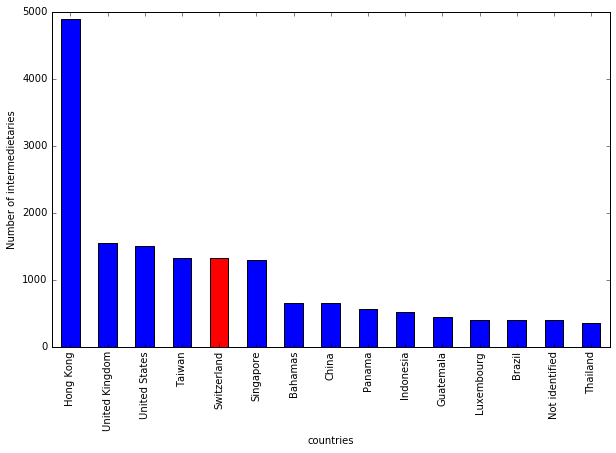

In [12]:
df = inter[['name','countries']].groupby('countries').count() \
    .sort_values(by='name',ascending=False).head(15)
df.plot.bar(legend=False, figsize=(10,6), color=['r' if d == 'Switzerland' else 'b' for d in df.index])
plt.ylabel('Number of intermedietaries')
plt.show()

### Officers

In [13]:
officers = pd.read_csv('../data/panama/Officers.csv', header=0, low_memory=False)

In [14]:
swiss_officers = filter_swiss(officers, process_address=False)

In [15]:
percent = 100*len(swiss_officers)/len(officers)
print('%.2f' % percent, '% of the officers are located in Switzerland.')

1.24 % of the officers are located in Switzerland.


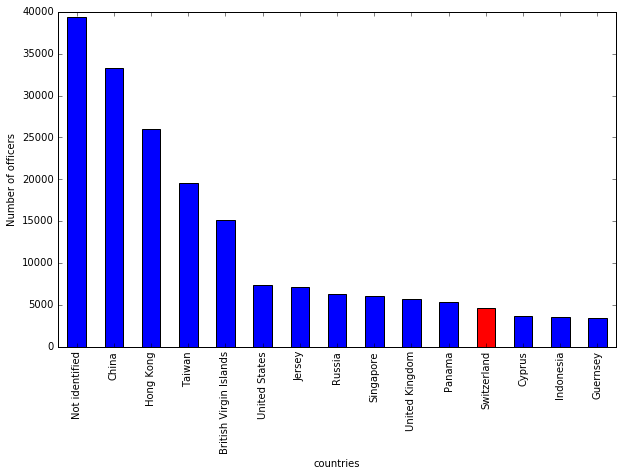

In [16]:
df = officers[['name','countries']].groupby('countries').count() \
    .sort_values(by='name',ascending=False).head(15)
df.plot.bar(legend=False, figsize=(10,6), color=['r' if d == 'Switzerland' else 'b' for d in df.index])
plt.ylabel('Number of officers')
plt.show()

### Addresses

In [17]:
addrs = pd.read_csv('../data/panama/Addresses.csv', header=0, low_memory=False)

In [18]:
swiss_addrs = filter_swiss(addrs)

In [19]:
percent = 100*len(swiss_addrs)/len(addrs)
print('%.2f' % percent, '% of the addresses are located in Switzerland.')

2.11 % of the addresses are located in Switzerland.


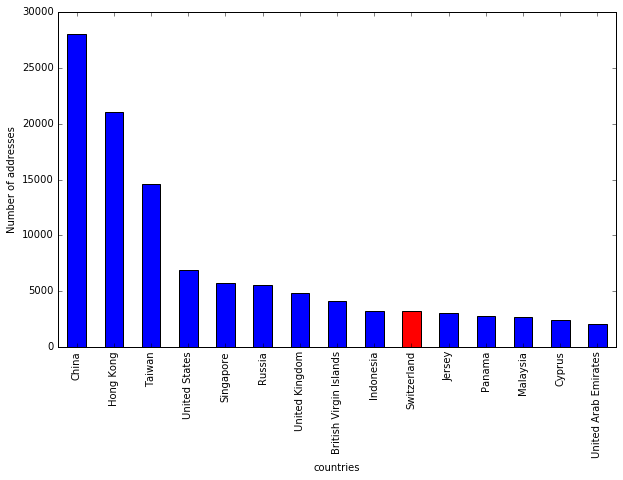

In [20]:
df = addrs[['address','countries']].groupby('countries').count() \
    .sort_values(by='address',ascending=False).head(15)
df.plot.bar(legend=False, figsize=(10,6), color=['r' if d == 'Switzerland' else 'b' for d in df.index])
plt.ylabel('Number of addresses')
plt.show()